# Vector classification dataset analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
df = pd.read_json("../data/processed/dataset_analytics/dataset_report.json")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
label                  14 non-null object
label_image_count      14 non-null int64
result                 14 non-null object
total_image_overlap    14 non-null int64
dtypes: int64(2), object(2)
memory usage: 528.0+ bytes


In [4]:
df

,label,label_image_count,result,total_image_overlap
0,floral,14837,"[{'label': 'heart', 'image_count': 6256, 'over...",11299
1,heart,6256,"[{'label': 'floral', 'image_count': 14837, 'ov...",4794
2,bird,6328,"[{'label': 'floral', 'image_count': 14837, 'ov...",3959
3,ball,10489,"[{'label': 'floral', 'image_count': 14837, 'ov...",6283
4,nature,22090,"[{'label': 'floral', 'image_count': 14837, 'ov...",17372
5,car,1497,"[{'label': 'floral', 'image_count': 14837, 'ov...",529
6,icons,56547,"[{'label': 'floral', 'image_count': 14837, 'ov...",26069
7,food,13598,"[{'label': 'floral', 'image_count': 14837, 'ov...",6977
8,tree,15356,"[{'label': 'floral', 'image_count': 14837, 'ov...",12477
9,hand,13921,"[{'label': 'floral', 'image_count': 14837, 'ov...",9799


In [5]:
# Unpack json data
from pandas.io.json import json_normalize #package for flattening json in pandas df
import json
#load json object
with open("../data/processed/dataset_analytics/dataset_report.json") as f:
    data = json.load(f)

#lets put the data into a pandas df
#clicking on raw_nyc_phil.json under "Input Files"
#tells us parent node is 'programs'
df = json_normalize(data, 'result', ["label","label_image_count", "total_image_overlap"],
                    record_prefix='result_', errors='ignore')



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
compare_image_count        30 non-null int64
compare_label              30 non-null object
compare_overlap            30 non-null int64
compare_overlap_percent    30 non-null float64
label                      30 non-null object
label_image_count          30 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.5+ KB


In [7]:
df.head(5)

,compare_image_count,compare_label,compare_overlap,compare_overlap_percent,label,label_image_count
0,6908,no-meaning,0,0.000000,cards,21546
1,2831,fail,198,0.918964,cards,21546
2,52032,collections,21546,100.000000,cards,21546
3,99630,single-elements,21546,100.000000,cards,21546
4,23578,abstracts,0,0.000000,cards,21546


In [8]:
# Extract the number of images under each label. max() returns
# the same as min() and mean() since the label_image_count is const
labels_image_count = df.groupby("label")["label_image_count"].max()

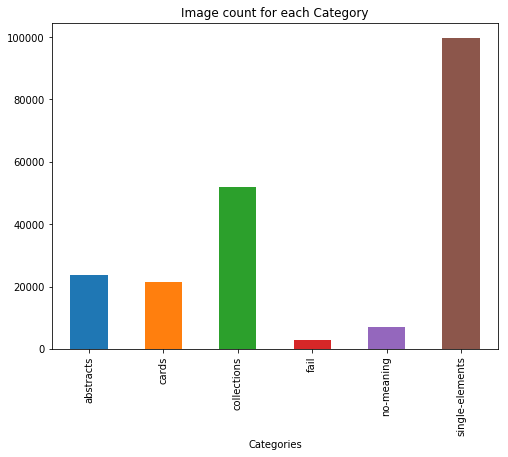

In [11]:
ax = labels_image_count.plot("bar", title="Image count for each Category", figsize=(8, 6))
ax.set_xlabel('Categories')
plt.show()

## A look at the overlap for each label

In [77]:
labels_with_overlap = df.groupby("label")["total_image_overlap", "label_image_count"].max()

In [78]:
labels_with_overlap

,total_image_overlap,label_image_count
label,,
background,19096,34723
ball,6283,10489
bird,3959,6328
car,529,1497
common_categories,0,13
floral,11299,14837
food,6977,13598
hand,9799,13921
heart,4794,6256


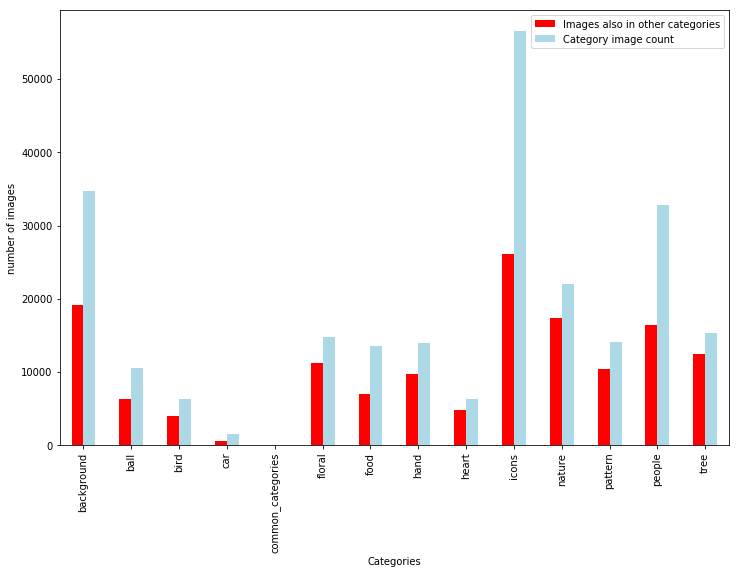

In [113]:
ax = labels_with_overlap.plot(kind="bar", figsize=(12, 8),color=['red', 'lightblue'])
ax.set_ylabel('number of images')
ax.set_xlabel('Categories')
ax.legend(["Images also in other categories","Category image count"])

plt.show()

In [121]:
unique_label_dfs = {}
for label in df['label']:
    unique_label_dfs[label] = df.loc[df['label'] == label]



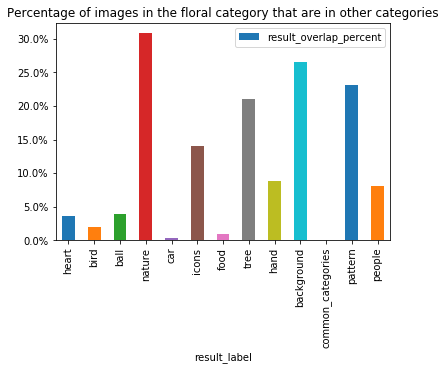

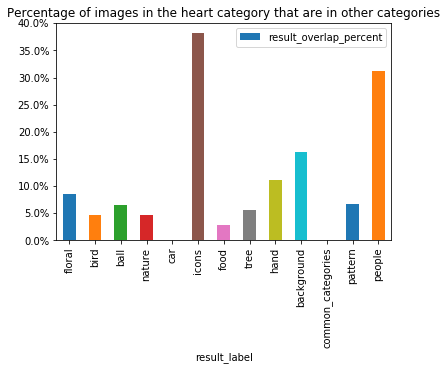

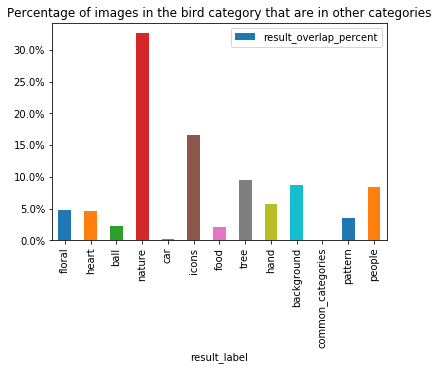

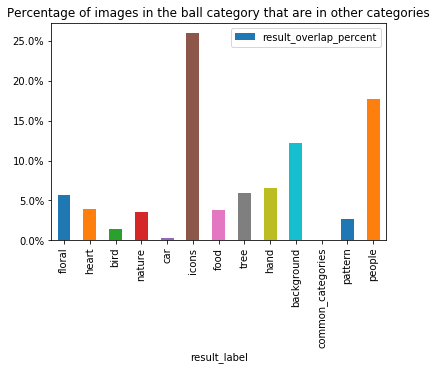

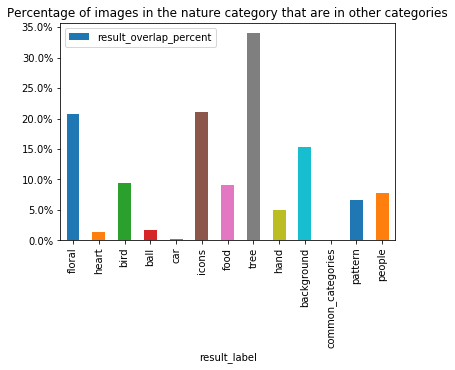

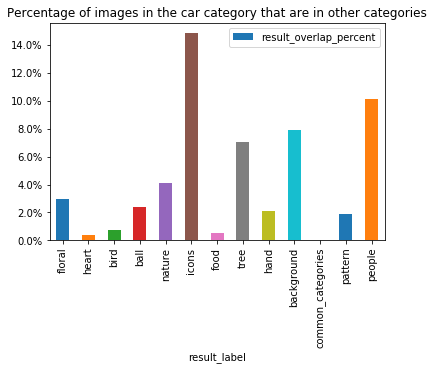

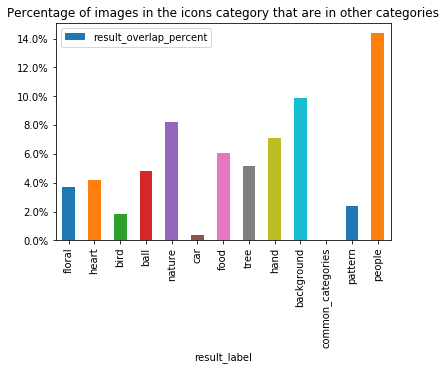

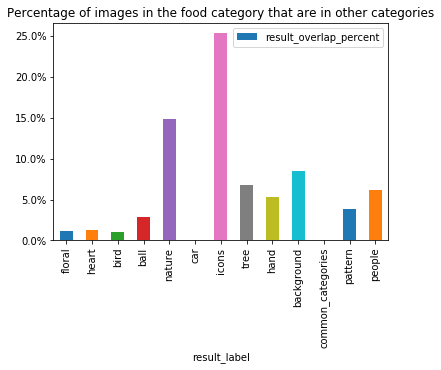

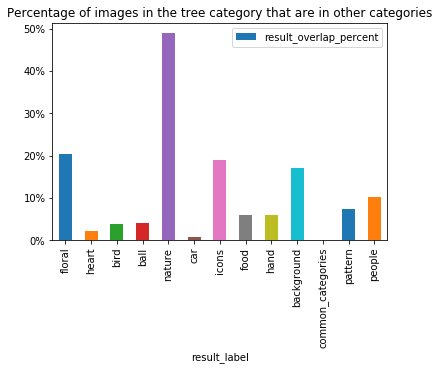

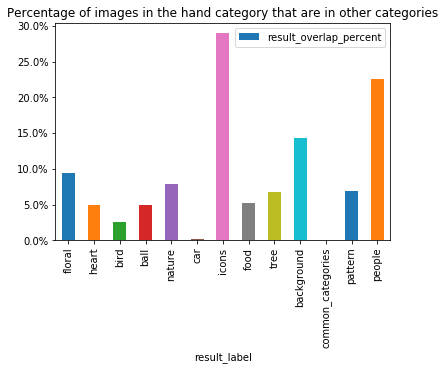

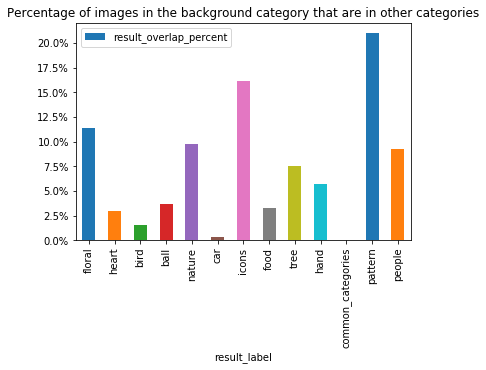

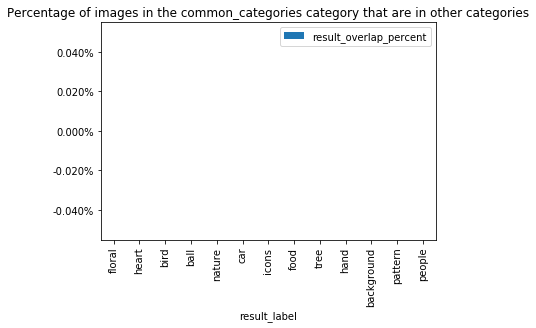

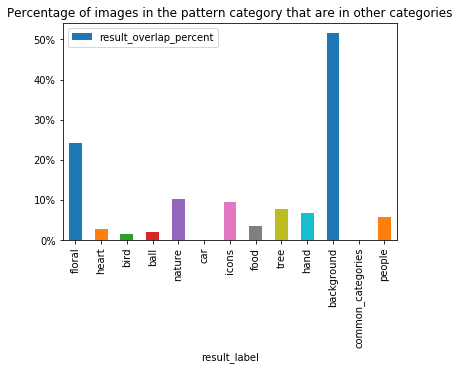

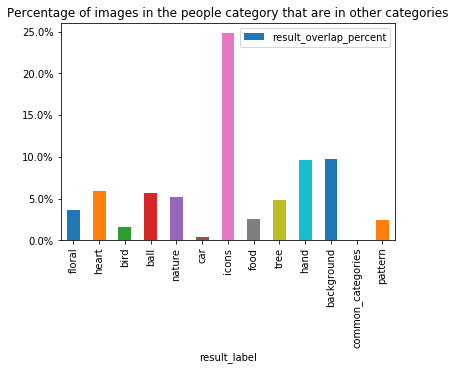

In [124]:
import matplotlib.ticker as ticker


for label, unique_df in unique_label_dfs.items():
    ax = unique_df.plot(x="result_label", y="result_overlap_percent", kind="bar", title="Percentage of images in the {} category that are in other categories".format(label))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    plt.show()

